In [1]:
folder_path = '/content/drive/My Drive/data/cataract_data'


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
import cv2

In [3]:
df=pd.read_csv('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/cataract_data.csv')

In [4]:
df

,image_path,label
0,cataract/477_right.jpg,Cataract
1,cataract/2247_right.jpg,Cataract
2,cataract/2154_left.jpg,Cataract
3,cataract/1444_left.jpg,Cataract
4,cataract/2136_left.jpg,Cataract
...,...,...
2107,normal/2531_right.jpg,Normal
2108,normal/2408_left.jpg,Normal
2109,normal/2659_right.jpg,Normal
2110,normal/2543_right.jpg,Normal


In [6]:
df['label'].value_counts()

label
Normal      1074
Cataract    1038
Name: count, dtype: int64

In [8]:
selected_records = df.groupby('label').first().reset_index()


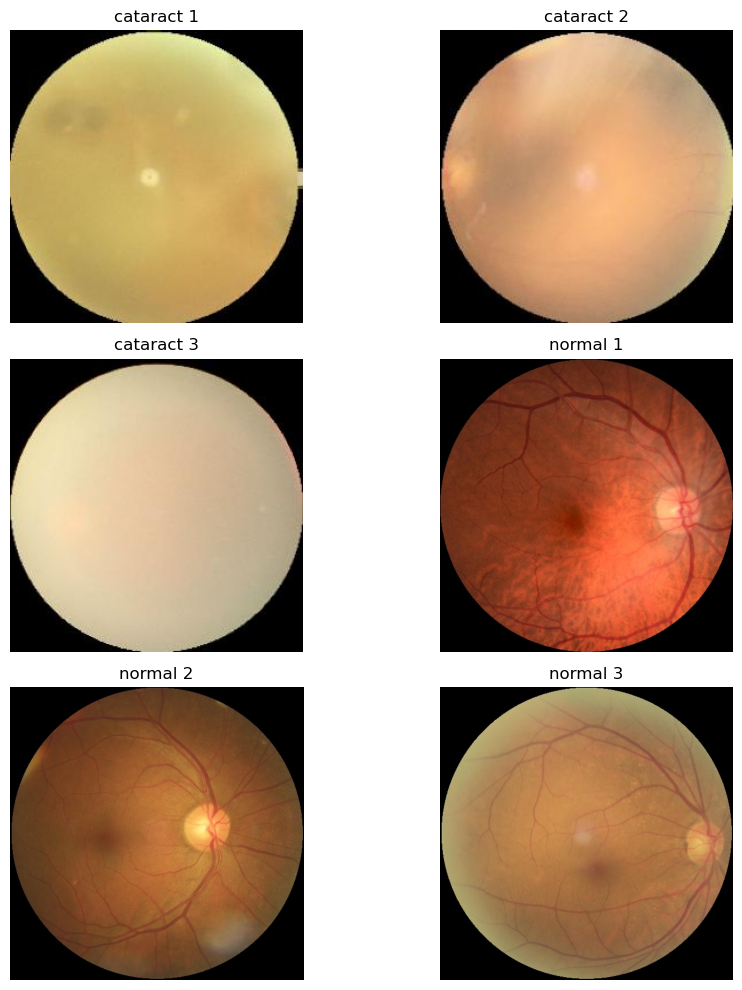

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

images = [
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/cataract/_0_4015166.jpg', 'cataract 1'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/cataract/_1_5346540.jpg', 'cataract 2'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/cataract/_2_8900343.jpg', 'cataract 3'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/normal/8_right.jpg', 'normal 1'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/normal/939_right.jpg', 'normal 2'),
    ('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/normal/2331_right.jpg', 'normal 3')
]

plt.figure(figsize=(10, 10))

for i, (img_path, title) in enumerate(images):
    img = Image.open(img_path)
    plt.subplot(3, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

plt.tight_layout()
plt.show()


In [10]:
image_folder = 'cataract_data/cataract'

image_sizes = {}

for image_file in os.listdir(image_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, image_file)
        
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes[image_file] = (width, height)

for image, size in image_sizes.items():
    print(f"{image}: {size[0]}x{size[1]} pixels")


2124_left.jpg: 512x512 pixels
_393_746807.jpg: 256x256 pixels
2125_left.jpg: 512x512 pixels
_182_9646286.jpg: 256x256 pixels
_245_498355.jpg: 256x256 pixels
_35_3480407.jpg: 256x256 pixels
_323_1448180.jpg: 256x256 pixels
_89_2075481.jpg: 256x256 pixels
_169_5886938.jpg: 256x256 pixels
_84_9231607.jpg: 256x256 pixels
553_left.jpg: 512x512 pixels
_351_7651498.jpg: 256x256 pixels
_362_9739218.jpg: 256x256 pixels
_225_8520.jpg: 256x256 pixels
_112_9621689.jpg: 256x256 pixels
2151_right.jpg: 512x512 pixels
2198_right.jpg: 512x512 pixels
_222_7343969.jpg: 256x256 pixels
2221_right.jpg: 512x512 pixels
_273_7267841.jpg: 256x256 pixels
_101_5139882.jpg: 256x256 pixels
_243_5311552.jpg: 256x256 pixels
_227_1163752.jpg: 256x256 pixels
_238_358899.jpg: 256x256 pixels
_114_9773152.jpg: 256x256 pixels
_303_1474676.jpg: 256x256 pixels
_295_8218216.jpg: 256x256 pixels
_283_6068531.jpg: 256x256 pixels
_190_3033991.jpg: 256x256 pixels
_288_8210584.jpg: 256x256 pixels
cataract_001.png: 2592x1728 pixels


In [11]:
image_folder = 'cataract_data/normal'

image_sizes = {}

for image_file in os.listdir(image_folder):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, image_file)
        
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes[image_file] = (width, height)

for image, size in image_sizes.items():
    print(f"{image}: {size[0]}x{size[1]} pixels")


3407_right.jpg: 512x512 pixels
3294_right.jpg: 512x512 pixels
2547_right.jpg: 512x512 pixels
3010_left.jpg: 512x512 pixels
2895_right.jpg: 512x512 pixels
3011_left.jpg: 512x512 pixels
2771_right.jpg: 512x512 pixels
2470_left.jpg: 512x512 pixels
2616_left.jpg: 512x512 pixels
2637_right.jpg: 512x512 pixels
2617_left.jpg: 512x512 pixels
3227_right.jpg: 512x512 pixels
3083_left.jpg: 512x512 pixels
3011_right.jpg: 512x512 pixels
2872_left.jpg: 512x512 pixels
951_left.jpg: 512x512 pixels
2685_left.jpg: 512x512 pixels
3157_right.jpg: 512x512 pixels
3119_left.jpg: 512x512 pixels
2367_right.jpg: 512x512 pixels
2826_right.jpg: 512x512 pixels
2438_left.jpg: 512x512 pixels
2529_right.jpg: 512x512 pixels
2690_right.jpg: 512x512 pixels
2659_right.jpg: 512x512 pixels
3059_left.jpg: 512x512 pixels
2974_right.jpg: 512x512 pixels
3058_left.jpg: 512x512 pixels
2933_left.jpg: 512x512 pixels
2932_left.jpg: 512x512 pixels
2531_left.jpg: 512x512 pixels
2415_right.jpg: 512x512 pixels
2399_left.jpg: 512x512 pi

In [12]:
input_folder = 'cataract_data/normal/'
output_folder = 'cataract_data/normal/cropped/'
target_width = 1024  

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        height = int(img.shape[0] * (target_width / img.shape[1]))
        new_size = (target_width, height)

        resized_img = cv2.resize(img, new_size)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

print("Resizing completed!")


Resizing completed!


In [13]:
input_folder = 'cataract_data/cataract/'
output_folder = 'cataract_data/cataract/cropped/'
target_width = 1024  

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        height = int(img.shape[0] * (target_width / img.shape[1]))
        new_size = (target_width, height)

        resized_img = cv2.resize(img, new_size)

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

print("Resizing completed!")


Resizing completed!


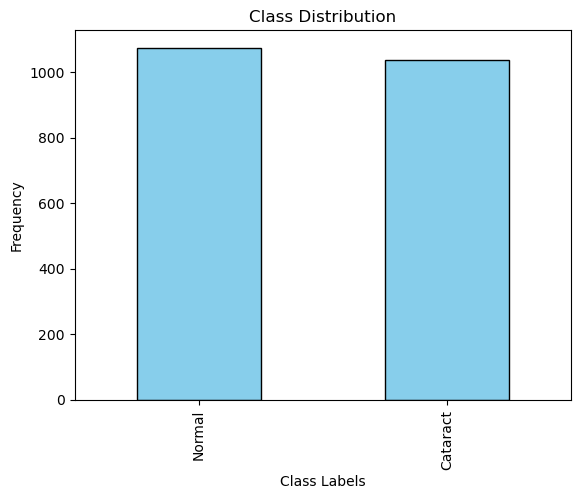

Class Weights: {'Cataract': 1.0173410404624277, 'Normal': 0.9832402234636871}


In [14]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

labels_df=pd.read_csv('/Users/priyankapalaniselvam/Downloads/RetinaNet/cataract_data/cataract_data.csv')
label_counts = labels_df['label'].value_counts()
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

classes = labels_df['label'].unique()
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=labels_df['label'])
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)


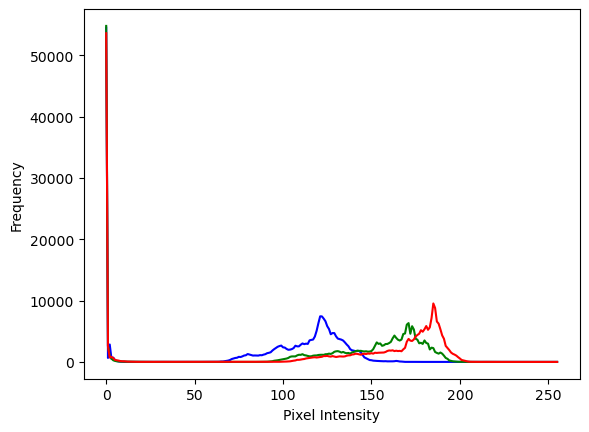

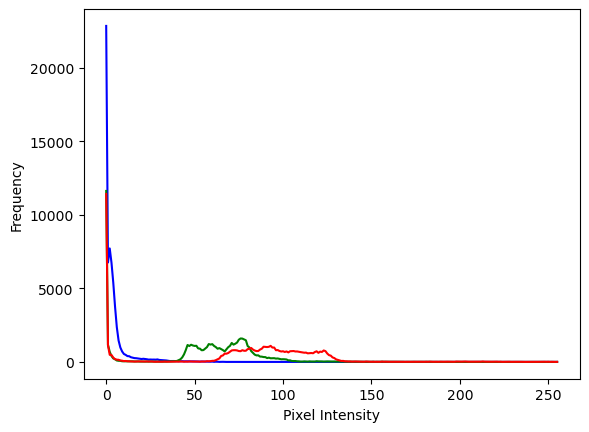

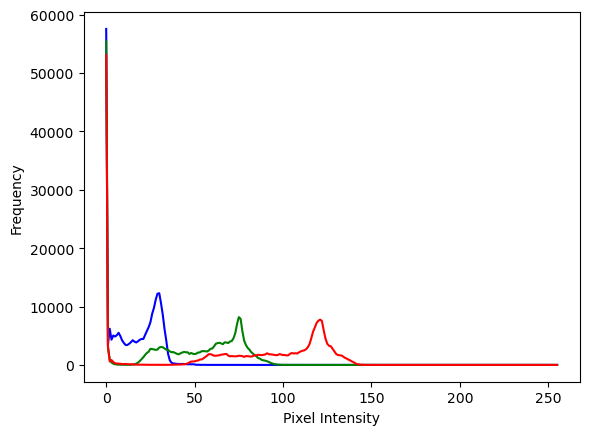

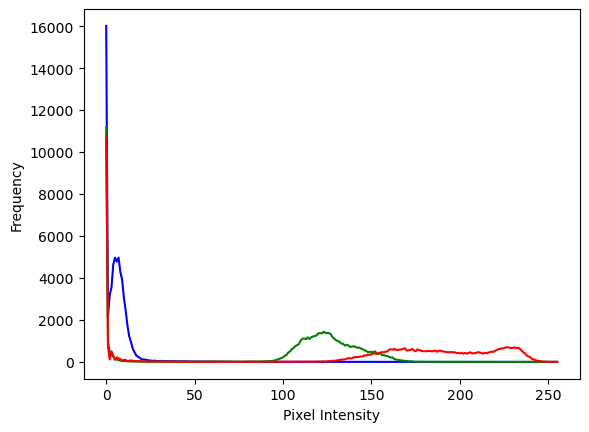

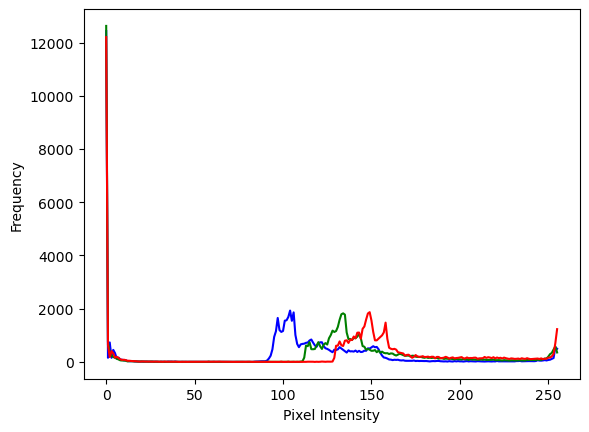

Number of grayscale images: 0


In [15]:
def plot_color_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for filename in os.listdir(input_folder)[:5]:  
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    if img is not None:
        plot_color_histogram(img)
        
gray_count = sum([1 for filename in os.listdir(input_folder) 
                  if filename.endswith(('.jpg', '.jpeg', '.png')) and 
                  cv2.imread(os.path.join(input_folder, filename)).shape[2] == 1])

print(f"Number of grayscale images: {gray_count}")


In [16]:
def detect_blur(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < threshold

blurred_images = []

for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)

    if img is not None:
        if detect_blur(img):
            blurred_images.append(filename)

print("Number of blurred images:", len(blurred_images))
print("Blurred image examples:", blurred_images[:5])


Number of blurred images: 259
Blurred image examples: ['_393_746807.jpg', '2125_left.jpg', '_222_7343969.jpg', '_273_7267841.jpg', 'cataract_001.png']


In [17]:
df.columns

Index(['image_path', 'label'], dtype='object')

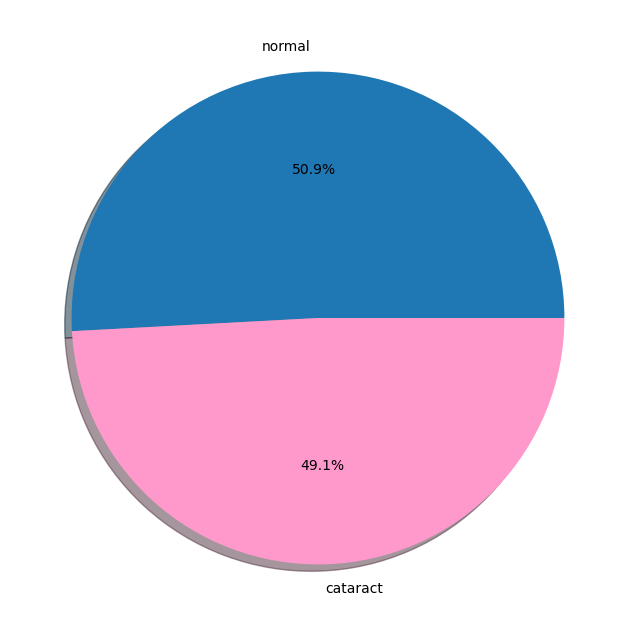

In [24]:
import matplotlib.pyplot as plt

colors = [
    '#1f77b4',  
    '#ff99cc'
]

plt.figure(figsize=(8, 8))
plt.pie(
    df['label'].value_counts(),
    autopct="%0.1f%%",
    labels=['normal', 'cataract'],
    shadow=True,
    explode=[0, 0],
    colors=colors
)

plt.show()
